In [1]:
import os
import numpy as np
import pandas as pd
import requests
import json
import re
import seaborn as sns
from IPython.display import IFrame
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

### PROJECT PREAMBLE
The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.
Datasets used:
- `twitter-archive-enhanced.csv`... Downloaded Manually
- `image_predictions.tsv` ... Downloaded programatically
- `tweet._json.txt` ... Downloaded manually due to my unsuccessful application of Twitter Developer account

>__GATHERING DATA__

In [2]:
# Downloading the image-prediction files programmatically. 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [3]:
folder_name = 'image_predict'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# writing image-prediction contents to image_predict folder
with open(os.path.join(folder_name, url.split("/")[-1]), mode="wb") as file:
    file.write(response.content)

*Reading imported and downloaded files into pandas dataframe*

In [2]:
# twitter archive dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
# nueral network dataset
image_predict = pd.read_csv('image_predict/image-predictions.tsv', sep='\t')

In [3]:
# Reading the json file

tweets_list = []

with open('tweets/tweet_json.txt', encoding='UTF-8') as json_file:

    for tweets in json_file:
        tweet = json.loads(tweets)
        # Extract variables from the 'tweet' dictionary
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
    
        # Create a dictionary with the JSON data and add it to the 'tweets_list.'
        tweets_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})

# Convert the data in the 'tweets_data' list to a DataFrame
df_tweet = pd.DataFrame(tweets_list, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

>__ASSESSING DATA__

__VISUAL ASSESSMENT__

In [4]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [5]:
image_predict

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [6]:
df_tweet

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

__PROGRAMATIC ASSESSMENT__

In [7]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
twitter_archive.query('rating_numerator > 100')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
290   838150277551247360           8.381455e+17         2.195506e+07   
313   835246439529840640           8.352460e+17         2.625958e+07   
902   758467244762497024                    NaN                  NaN   
979   749981277374128128                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
2074  670842764863651840                    NaN                  NaN   

                      timestamp  \
188   2017-04-22 19:15:32 +0000   
189   2017-04-22 19:05:32 +0000   
290   2017-03-04 22:12:52 +0000   
313   2017-02-24 21:54:03 +0000   
902   2016-07-28 01:00:57 +0000   
979   2016-07-04 15:00:45 +0000   
1120  2016-05-13 16:15:54 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1779  2015-12-18 05:06:23 +0000   
2074  2015-11-29 05:52:33 +0000   

                                                 source  \
188   <a href="http://twitter.com/download/iphone" r...   
189   <a href="http://twitter.com/download/iphone" r...   
290   <a href="http://twitter.com/download/iphone" r...   
313   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
979   <a href="https://about.twitter.com/products/tw...   
1120  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
2074  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
188   @dhmontgomery We also gave snoop dogg a 420/10...                  NaN   
189   @s8n You tried very hard to portray this good ...                  NaN   
290                                  @markhoppus 182/10                  NaN   
313   @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   
902   Why does this never happen at my front door......                  NaN   
979   This is Atticus. He's quite simply America af....                  NaN   
1120  Say hello to this unbelievably well behaved sq...                  NaN   
1634  Two sneaky puppers were not initially seen, mo...                  NaN   
1635  Someone help the girl is being mugged. Several...                  NaN   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...                  NaN   
2074  After so many requests... here you go.\n\nGood...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
188                        NaN                        NaN   
189                        NaN                        NaN   
290                        NaN                        NaN   
313                        NaN                        NaN   
902                        NaN                        NaN   
979                        NaN                        NaN   
1120                       NaN                        NaN   
1634                       NaN                        NaN   
1635                       NaN                        NaN   
1779                       NaN                        NaN   
2074                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
188                                                 NaN               420   
189                                                 NaN               666   
290                                                 NaN               182   
313                

In [11]:
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
939   753039830821511168                    NaN                  NaN   
184   856526610513747968           8.558181e+17         4.196984e+09   
1617  685169283572338688                    NaN                  NaN   
633   793845145112371200                    NaN                  NaN   
535   807059379405148160                    NaN                  NaN   

                      timestamp  \
939   2016-07-13 01:34:21 +0000   
184   2017-04-24 15:13:52 +0000   
1617  2016-01-07 18:41:01 +0000   
633   2016-11-02 16:00:06 +0000   
535   2016-12-09 03:08:45 +0000   

                                                 source  \
939   <a href="http://vine.co" rel="nofollow">Vine -...   
184   <a href="http://twitter.com/download/iphone" r...   
1617  <a href="http://twitter.com/download/iphone" r...   
633   <a href="http://twitter.com/download/iphone" r...   
535   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
939   So this just changed my life. 13/10 please enj...                  NaN   
184   THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...                  NaN   
1617  Meet Gerbald. He just found out he's adopted. ...                  NaN   
633   This is Clark. He was just caught wearing pant...                  NaN   
535   RT @dog_rates: This is Cali. She arrived preas...         7.829691e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
939                        NaN                        NaN   
184                        NaN                        NaN   
1617                       NaN                        NaN   
633                        NaN                        NaN   
535               4.196984e+09  2016-10-03 15:42:44 +0000   

                                          expanded_urls  rating_numerator  \
939                       https://vine.co/v/5W2Dg3XPX7a                13   
184   https://twitter.com/dog_rates/status/856526610...                14   
1617  https://twitter.com/dog_rates/status/685169283...                11   
633   https://twitter.com/dog_rates/status/793845145...                13   
535   https://twitter.com/dog_rates/status/782969140...                12   

      rating_denominator     name doggo floofer  pupper puppo  
939                   10     None  None    None    None  None  
184                   10     None  None    None    None  None  
1617                  10  Gerbald  None    None  pupper  None  
633                   10    Clark  None    None    None  None  
535                   10     Cali  None    None    None  None

In [12]:
twitter_archive.tweet_id.duplicated().sum()

0

In [13]:
twitter_archive[twitter_archive.text.str.contains('RT') & twitter_archive.text.str.contains('@')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp  \
19    2017-07-21 01:02:36 +0000   
32    2017-07-15 02:45:48 +0000   
36    2017-07-13 01:35:06 +0000   
68    2017-06-26 00:13:58 +0000   
73    2017-06-24 00:09:53 +0000   
...                         ...   
1023  2016-06-25 01:52:36 +0000   
1043  2016-06-17 16:01:16 +0000   
1242  2016-03-21 19:31:59 +0000   
2259  2015-11-20 03:51:52 +0000   
2260  2015-11-20 03:51:47 +0000   

                                                 source  \
19    <a href="http://twitter.com/download/iphone" r...   
32    <a href="http://twitter.com/download/iphone" r...   
36    <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
73    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1023  <a href="http://twitter.com/download/iphone" r...   
1043  <a href="http://twitter.com/download/iphone" r...   
1242  <a href="http://twitter.com/download/iphone" r...   
2259  <a href="http://twitter.com" rel="nofollow">Tw...   
2260  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
19    RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...         8.860537e+17   
36    RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
73    RT @dog_rates: Meet Shadow. In an attempt to r...         8.782815e+17   
...                                                 ...                  ...   
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   
1043  RT @dog_rates: Extremely intelligent dog here....         6.671383e+17   
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
2259  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
2260  RT @dogratingrating: Unoriginal idea. Blatant ...         6.675484e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
19                4.196984e+09  2017-07-19 00:47:34 +0000   
32                1.960740e+07  2017-07-15 02:44:07 +0000   
36                4.196984e+09  2017-02-12 01:04:29 +0000   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
73                4.196984e+09  2017-06-23 16:00:04 +0000   
...                        ...                        ...   
1023              4.196984e+09  2015-11-21 00:46:50 +0000   
1043              4.196984e+09  2015-11-19 00:32:12 +0000   
1242              7.832140e+05  2016-03-21 19:29:52 +0000   
2259              4.296832e+09  2015-11-20 03:43:06 +0000   
2260              4.296832e+09  2015-11-20 03:41:59 +0000   

                                          expanded_urls  rating_numerator  \
19    https://twitter.com/dog_rates/status/887473957...                13   
32    https://twitter.com/dog_rates/status/886053434...                12   
36    https://twitter.com/dog_rates/status/830583320...                13   
68    https://twitt

In [14]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predict.sample(5)

tweet_id                                          jpg_url  \
1841  838083903487373313  https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg   
613   680145970311643136  https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg   
15    666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
2000  876120275196170240  https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg   
1252  747963614829678593  https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg   

      img_num                    p1   p1_conf  p1_dog             p2  \
1841        2                  chow  0.800975    True      seat_belt   
613         1      miniature_poodle  0.457117    True     toy_poodle   
15          1                 Lhasa  0.582330    True       Shih-Tzu   
2000        1  Bernese_mountain_dog  0.534327    True  Saint_Bernard   
1252        1                kelpie  0.307672    True  Irish_terrier   

       p2_conf  p2_dog                          p3   p3_conf  p3_dog  
1841  0.164133   False                  Pomeranian  0.017981    True  
613   0.226481    True                 Maltese_dog  0.067682    True  
15    0.166192    True              Dandie_Dinmont  0.089688    True  
2000  0.346312    True  Greater_Swiss_Mountain_dog  0.094933    True  
1252  0.197486    True                       dingo  0.105475   False

In [16]:
image_predict.tweet_id.duplicated().sum()

0

In [17]:
image_predict.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [18]:
image_predict.jpg_url.duplicated().sum()

66

In [19]:
df_tweet.tail()

tweet_id  retweet_count  favorite_count
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

In [20]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
df_tweet.tweet_id.duplicated().sum()

0

>__ASSESSMENT SUMMARY__

*__Quality__*

`twitter_archive`
- For the purpose of this analysis, the name column will not be considered
- There are 181 retweets (retweeted_status_id) and there are 78 replies (in_reply_to_status_id)
- There are three columns to indicate is_dog, it is better to add another one depending on them to be used for filtering purposes.
- 2297 tweets with linked to images; so 59 tweets are without images.
- Redundant columns (in_reply_to_user_id, 'retweeted_status_user_id', 'retweeted_status_timestamp')
- The data type for timestamp is string


`image_predict`
- There are 2075 image predictions only,the rest will be classified as "missing data".
- The columns' names are not descriptive.
- There are 66 duplicate jpg urls

*__Tidiness__*

`twitter_archive`
- There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
- Convert all three Data Frames to one master_dataset

>__CLEANING DATA__

In [22]:
# Making copies of dataframes
df_image = image_predict.copy()
df_archive = twitter_archive.copy()
df_tweets = df_tweet.copy()

### Define
- Drop tweet that is either retweeted or a quoted reply
- Drop these columns *(in_reply_to_status_id, ... retweeted_status_timestamp,name)*
- Change timestamp data type
- Combine *(rating_numerator, rating_denominator)* columns
- Drop *(rating_numerator, rating_denominator)* columns
- Unpivot the four dog name columns

### Code

In [23]:
# Extracting the retweets
retweets = df_archive.retweeted_status_id.notnull()


# Dropping the retweets
df_archive = df_archive[~retweets]

In [24]:
# Extracting the replies
replies = df_archive.in_reply_to_status_id.notnull()

# Dropping replies
df_archive = df_archive[~replies]

In [25]:
# dropping redundant columns
df_archive.drop(['in_reply_to_status_id',  'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                 'retweeted_status_timestamp', 'expanded_urls', 'source','name'], axis=1, inplace=True)

In [26]:
# converting timestamp to a datetime data type
df_archive['timestamp'] = pd.to_datetime(df_archive.timestamp)

In [27]:
# Creating a single column for rating
df_archive['rating'] = df_archive.rating_numerator / df_archive.rating_denominator

In [28]:
df_archive.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [29]:
# Unpivoring the dog names columns
# use a for loop to replace all the 'None'
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for dog in stage:
        df_archive[dog] = df_archive[dog].replace("None", '')

In [30]:
# Creating a new column for dog stage
df_archive['dog_stage'] = df_archive[['doggo', 'floofer', 'pupper','puppo']].agg(''.join, axis=1)

# drop the four old colomns
df_archive = df_archive.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty dog stage cells
df_archive['dog_stage'] = df_archive['dog_stage'].replace('', np.nan)

### Test

In [31]:
df_archive.dtypes

tweet_id                   int64
timestamp    datetime64[ns, UTC]
text                      object
rating                   float64
dog_stage                 object
dtype: object

In [32]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2097 non-null   int64              
 1   timestamp  2097 non-null   datetime64[ns, UTC]
 2   text       2097 non-null   object             
 3   rating     2097 non-null   float64            
 4   dog_stage  336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 98.3+ KB


In [33]:
df_archive.sample(5)

tweet_id                 timestamp  \
1575  687476254459715584 2016-01-14 03:28:06+00:00   
1157  724405726123311104 2016-04-25 01:12:38+00:00   
2049  671504605491109889 2015-12-01 01:42:28+00:00   
707   785515384317313025 2016-10-10 16:20:36+00:00   
1571  687704180304273409 2016-01-14 18:33:48+00:00   

                                                   text  rating dog_stage  
1575  This is Curtis. He's a fluffball. 11/10 would ...     1.1    pupper  
1157  This is Ashleigh. She's having Coachella withd...     1.0    pupper  
2049  This is Charlie. He was just informed that dog...     1.1       NaN  
707      Today, 10/10, should be National Dog Rates Day     1.0       NaN  
1571  Say hello to Blakely. He thinks that's a hat. ...     0.9    pupper

In [34]:
df_archive[df_archive.text.str.contains('RT') & df_archive.text.str.contains('@')]

Empty DataFrame
Columns: [tweet_id, timestamp, text, rating, dog_stage]
Index: []

In [35]:
df_archive.dog_stage.value_counts()

pupper          221
doggo            72
puppo            23
floofer           9
doggopupper       9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

### Define

- Drop the 66 duplicated image jpg urls
- Convert the nine (9) columns representing the various predictions and their confidence levels into two columns namely:
__*dog_type*__ and __*Confidence*__
- Convert the names of the dog types in the newly created column to lower case letters for consistency
- Drop the nine columns: __*(p1,p1_dog,p1_conf,p2,p2_dog,p2_dog,p3,p3_dog,p3_conf)*__
- Merge image prediction and tweets_json to contain only tweets with image data (inner join)

### Code

In [36]:
# drop duplicated image jpg urls
df_image = df_image.drop_duplicates(subset='jpg_url', keep='first')

In [37]:
# the prediction of dog columns into one column
condition_list = [(df_image['p1_dog']==True), 
                 (df_image['p2_dog']==True), 
                 (df_image['p3_dog']==True)]
selection_list = [(df_image['p1']), 
                 (df_image['p2']), 
                 (df_image['p3']) 
                 ]
df_image['dog_type'] = np.select(condition_list, selection_list, default = np.nan)

In [38]:
# converting the three confidence colmns into one
condition_list = [(df_image['p1_dog']==True), 
                 (df_image['p2_dog']==True), 
                 (df_image['p3_dog']==True)]
selection_list = [(df_image['p1_conf']), 
                 (df_image['p2_conf']), 
                 (df_image['p3_conf']) 
                 ]
df_image['confidence'] = np.select(condition_list, selection_list, default = np.nan)

In [39]:
df_image['dog_type'] = df_image.dog_type.str.lower()

In [40]:
df_image = df_image.drop(['p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'], axis=1)

In [41]:
df_clean = pd.merge(df_tweet,df_image, left_on='tweet_id', right_on='tweet_id', how='inner')

In [42]:
# [since text and time from twitter archived will be used for my analysis,]
# perform an inner join to get rid of rows of tweets without [text and timestamp]
df_final = pd.merge(df_clean,df_archive, left_on='tweet_id', right_on='tweet_id', how='inner')

In [43]:
# Reordering the columns in the final dataset before storing
df_final_clean = df_final[['tweet_id','timestamp','text','jpg_url','img_num','dog_type','dog_stage','rating',
                     'confidence','retweet_count','favorite_count']]

### Test

In [44]:
df_image.jpg_url.duplicated().sum()

0

In [45]:
df_image.dog_type.value_counts()

golden_retriever        158
labrador_retriever      108
pembroke                 95
chihuahua                91
pug                      63
                       ... 
scotch_terrier            1
entlebucher               1
japanese_spaniel          1
standard_schnauzer        1
bouvier_des_flandres      1
Name: dog_type, Length: 113, dtype: int64

In [46]:
df_clean.sample(5)

tweet_id  retweet_count  favorite_count  \
985   710272297844797440           1425            4945   
677   757725642876129280           1391            5022   
401   809220051211603969           6554           22246   
718   751251247299190784           6695           13791   
1840  668986018524233728            183             578   

                                                jpg_url  img_num  \
985     https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg        1   
677     https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg        2   
401     https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg        1   
718   https://pbs.twimg.com/ext_tw_video_thumb/75125...        1   
1840    https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg        1   

                  dog_type  confidence  
985   old_english_sheepdog    0.586307  
677     labrador_retriever    0.128128  
401             pomeranian    0.819511  
718           walker_hound    0.178852  
1840             chihuahua    0.005640

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2008 non-null   int64  
 1   retweet_count   2008 non-null   int64  
 2   favorite_count  2008 non-null   int64  
 3   jpg_url         2008 non-null   object 
 4   img_num         2008 non-null   int64  
 5   dog_type        1691 non-null   object 
 6   confidence      1691 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 125.5+ KB


In [48]:
df_tweets.sample(5)

tweet_id  retweet_count  favorite_count
1138  727685679342333952            720            3206
331   832769181346996225             43               0
1228  713411074226274305           1440            4802
2109  670442337873600512            213             690
1184  718540630683709445           1137            2730

In [49]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [50]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1971 non-null   int64              
 1   timestamp       1971 non-null   datetime64[ns, UTC]
 2   text            1971 non-null   object             
 3   jpg_url         1971 non-null   object             
 4   img_num         1971 non-null   int64              
 5   dog_type        1666 non-null   object             
 6   dog_stage       303 non-null    object             
 7   rating          1971 non-null   float64            
 8   confidence      1666 non-null   float64            
 9   retweet_count   1971 non-null   int64              
 10  favorite_count  1971 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(4)
memory usage: 184.8+ KB


In [51]:
df_final_clean.tail()

tweet_id                 timestamp  \
1966  666049248165822465 2015-11-16 00:24:50+00:00   
1967  666044226329800704 2015-11-16 00:04:52+00:00   
1968  666033412701032449 2015-11-15 23:21:54+00:00   
1969  666029285002620928 2015-11-15 23:05:30+00:00   
1970  666020888022790149 2015-11-15 22:32:08+00:00   

                                                   text  \
1966  Here we have a 1949 1st generation vulpix. Enj...   
1967  This is a purebred Piers Morgan. Loves to Netf...   
1968  Here is a very happy pup. Big fan of well-main...   
1969  This is a western brown Mitsubishi terrier. Up...   
1970  Here we have a Japanese Irish Setter. Lost eye...   

                                              jpg_url  img_num  \
1966  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   
1967  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
1968  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
1969  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
1970  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   

                    dog_type dog_stage  rating  confidence  retweet_count  \
1966      miniature_pinscher       NaN     0.5    0.560311             41   
1967     rhodesian_ridgeback       NaN     0.6    0.408143            147   
1968         german_shepherd       NaN     0.9    0.596461             47   
1969                 redbone       NaN     0.7    0.506826             48   
1970  welsh_springer_spaniel       NaN     0.8    0.465074            532   

      favorite_count  
1966             111  
1967             311  
1968             128  
1969             132  
1970            2535

SAVING THE FINAL DATASET TO A CSV FILE

In [52]:
df_final_clean.to_csv('twitter_archive_master.csv', index=False)

> DATA ANALYSIS AND VISUALIZATIONS

Is there a correlation among Rating, Retweet Count and Favorite Count?

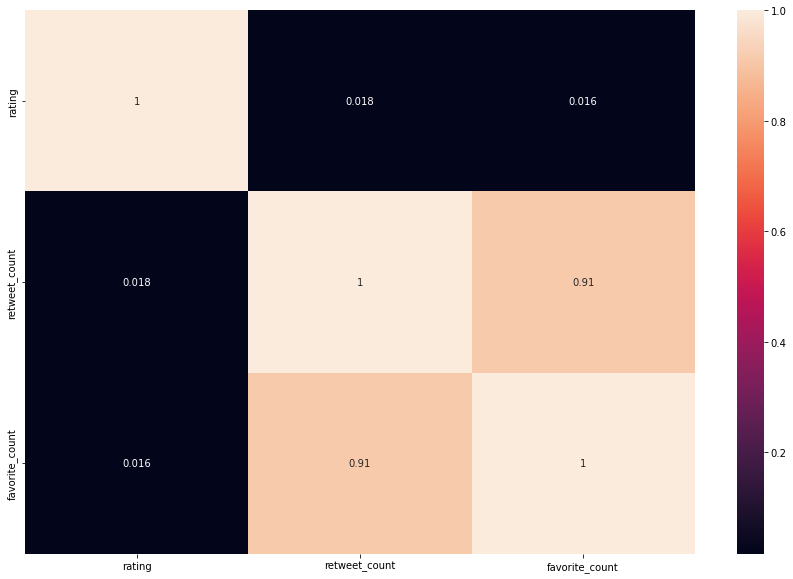

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_final_clean[['rating','retweet_count','favorite_count']].corr(), ax=ax, annot=True);

- __0.91__: There exist a very strong correlation between *Favorite Count and Retweet Count*
- __0.018__: There is little or no correlation between *Rating and Retweet Count*
- __0.016__: There is little or no correlation between *Rating and Favorite Count*

Which Dog types were correctly predicted the most? __Top 3__

In [54]:
df_final_clean.dog_type.value_counts()[:3]

golden_retriever      156
labrador_retriever    106
pembroke               94
Name: dog_type, dtype: int64

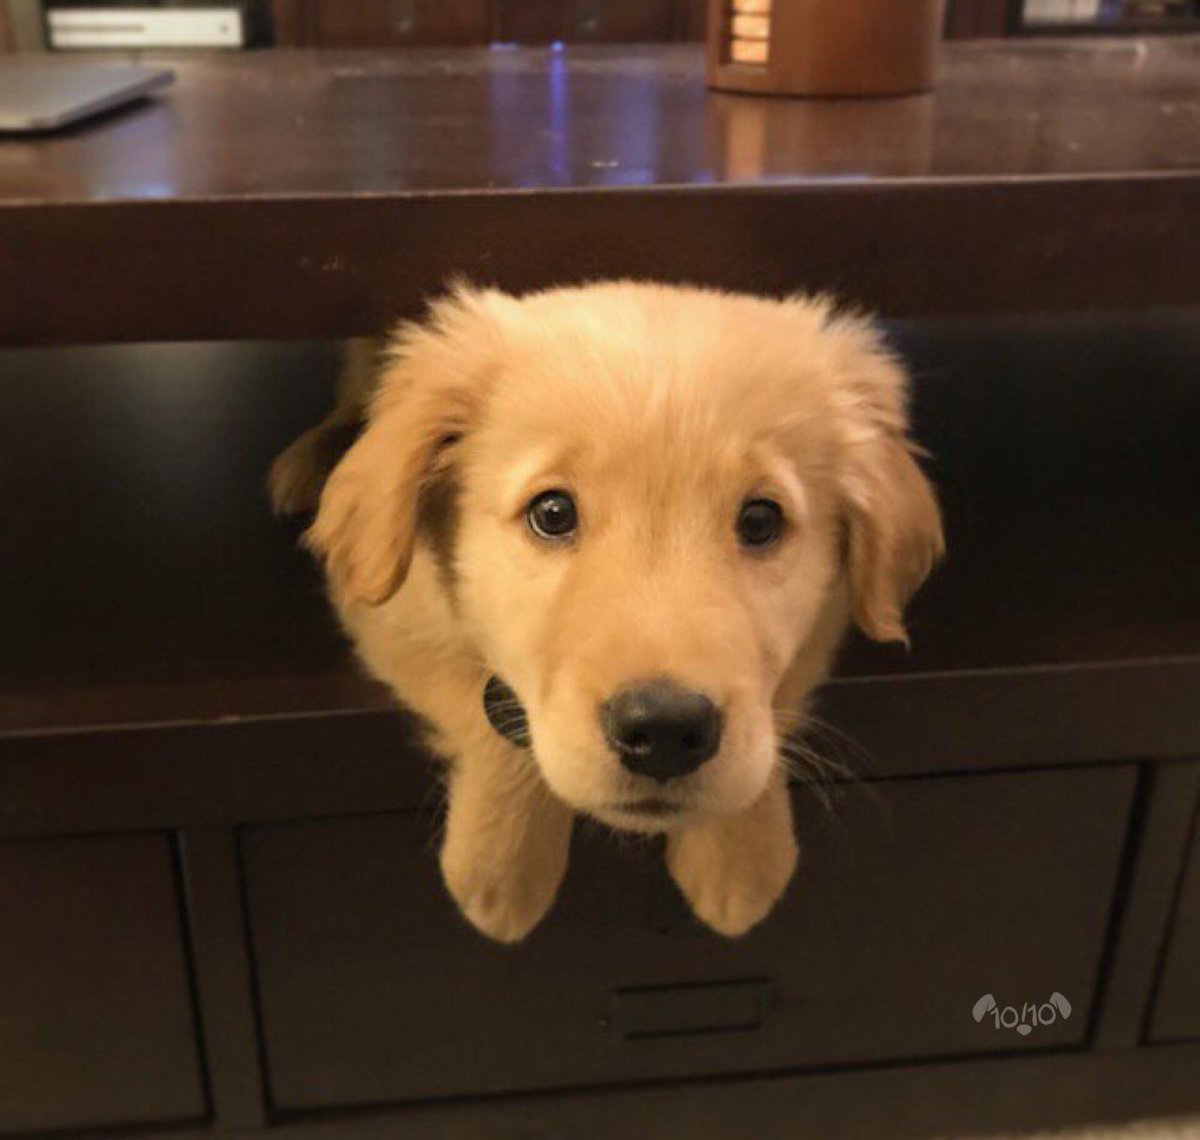

In [55]:
# Getting an image of the most liked golden_retriever picture
golden_retriever = df_final_clean.query('dog_type == "golden_retriever"').sort_values(by = 'favorite_count',ascending = False)
#Getting the url of golden retriever's most liked picture
url = golden_retriever.jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

> An image of a Golden Retriever with the most Favorite Count

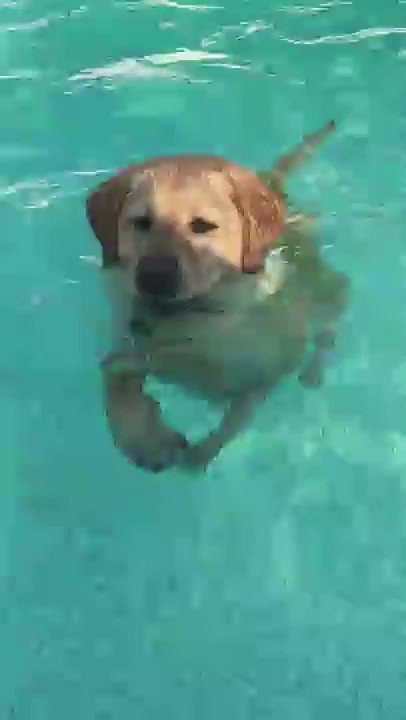

In [56]:
# Getting an image of the most liked labrador_retriever picture
golden_retriever = df_final_clean.query('dog_type == "labrador_retriever"').sort_values(by = 'favorite_count',ascending = False)
#Getting the url of golden retriever's most liked picture
url = golden_retriever.jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

> An Image of the Labrador Retriever with the most Favorite Count

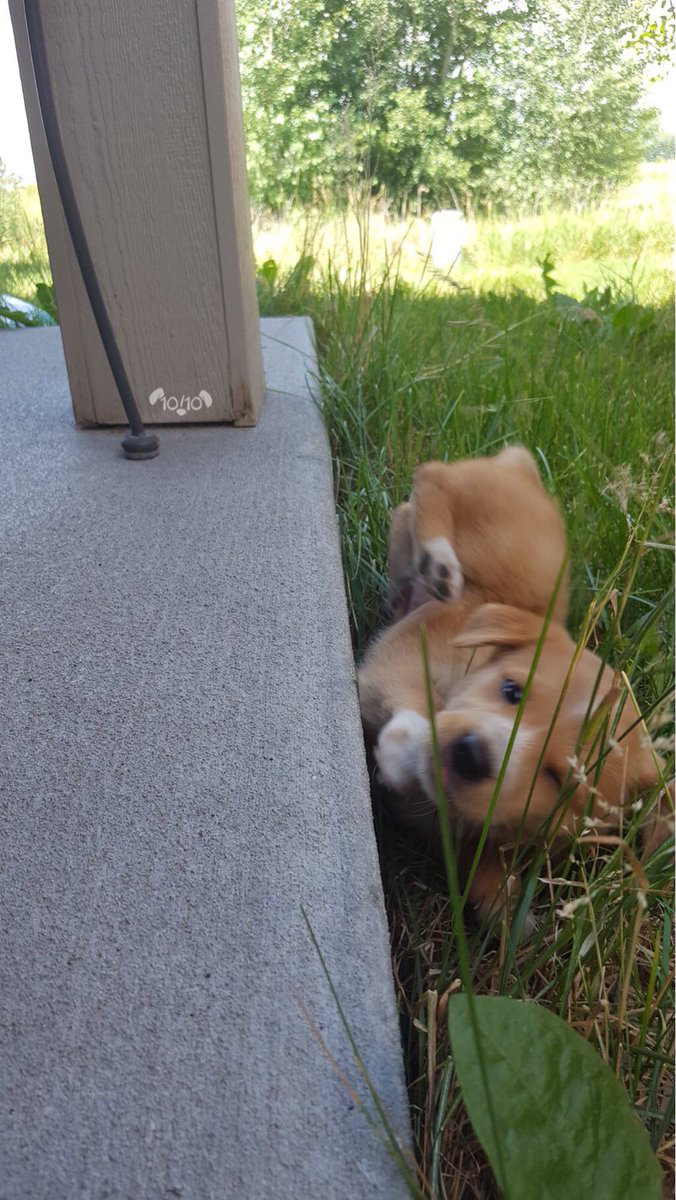

In [57]:
# Getting an image of the most liked pembroke picture
golden_retriever = df_final_clean.query('dog_type == "pembroke"').sort_values(by = 'favorite_count',ascending = False)
#Getting the url of golden retriever's most liked picture
url = golden_retriever.jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

> An image of a Pembroke with the most Favorite Count

What does our raters say in their tweets?

In [67]:
#creatinh a function to clean hyperlinks from text column in df_final_clean
def cleanTxt(text):
     text = re.sub(r'https?:\/\/\S+', '', text)
        
     return text

# Cleaning the column
df_final_clean['text'] = df_final_clean.text.apply(cleanTxt)

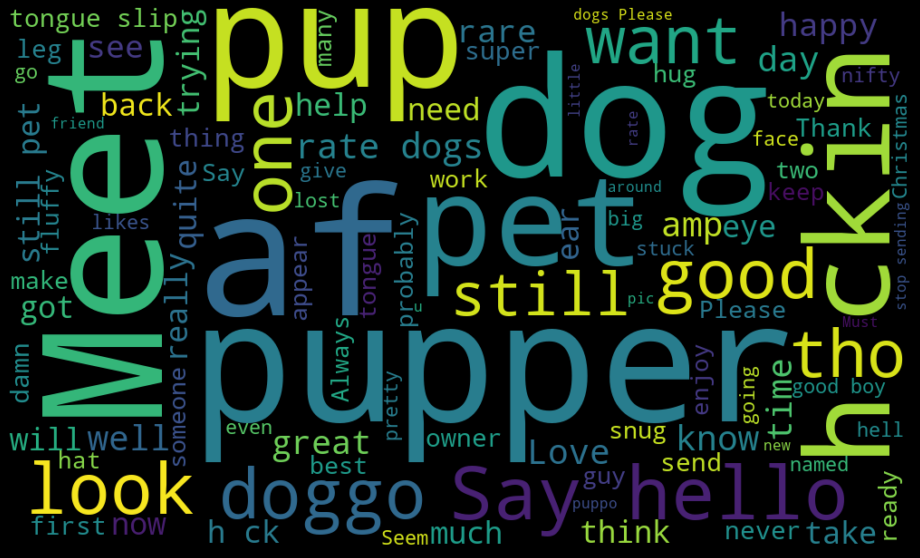

In [68]:
text = ' '.join( [twts for twts in df_final_clean.text]) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = stopwords,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

> Wordcloud of the content of tweets

Which dog type and image received the highest rating?

In [69]:
df_final_clean.rating.max()

177.6

In [70]:
df_final_clean.query('rating == 177.60')

tweet_id                 timestamp  \
722  749981277374128128 2016-07-04 15:00:45+00:00   

                                                  text  \
722  This is Atticus. He's quite simply America af....   

                                             jpg_url  img_num dog_type  \
722  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg        1      NaN   

    dog_stage  rating  confidence  retweet_count  favorite_count  
722       NaN   177.6         NaN           2772            5569

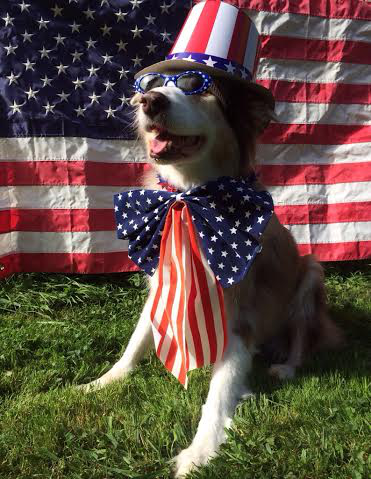

In [73]:
#Getting the url of the dog with the highly rated dog
url = df_final_clean.query('rating == 177.60').jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

> Highly rated dog (dog type unknown because prediction was incorrect)

Which dog type image received the highest favorite count?

In [59]:
df_final_clean.favorite_count.max()

132810

In [60]:
df_final_clean.query('favorite_count == 132810')

tweet_id                 timestamp  \
306  822872901745569793 2017-01-21 18:26:02+00:00   

                                                  text  \
306  Here's a super supportive puppo participating ...   

                                             jpg_url  img_num  \
306  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg        1   

             dog_type dog_stage  rating  confidence  retweet_count  \
306  lakeland_terrier     puppo     1.3    0.196015          48265   

     favorite_count  
306          132810

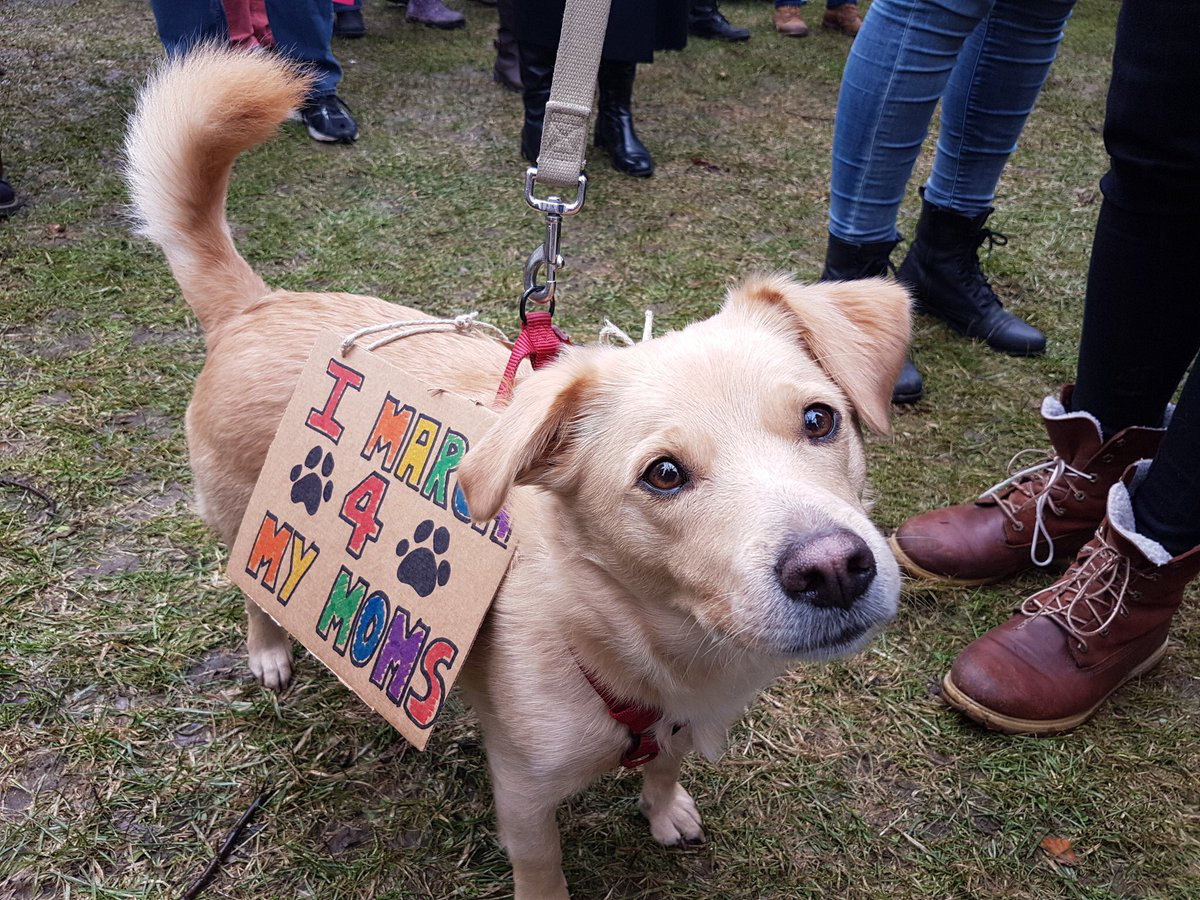

In [61]:
#Getting the url of the dog with the highest favorite count
url = df_final_clean.query('favorite_count == 132810').jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

> An image of a Lakeland Terrier [Puppo]

Which dog type image received the highest retweet count?

In [62]:
df_final_clean.retweet_count.max()

79515

In [63]:
df_final_clean.query('retweet_count == 79515')

tweet_id                 timestamp  \
769  744234799360020481 2016-06-18 18:26:18+00:00   

                                                  text  \
769  Here's a doggo realizing you can stand in a po...   

                                               jpg_url  img_num  \
769  https://pbs.twimg.com/ext_tw_video_thumb/74423...        1   

               dog_type dog_stage  rating  confidence  retweet_count  \
769  labrador_retriever     doggo     1.3    0.825333          79515   

     favorite_count  
769          131075

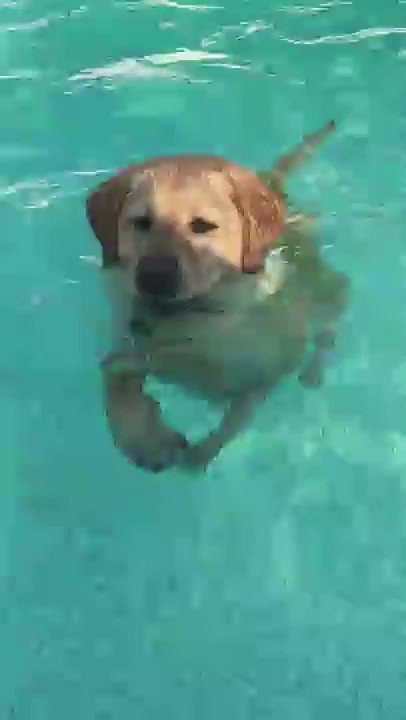

In [64]:
#Getting the url of the dog with the highest favorite count
url = df_final_clean.query('retweet_count == 79515').jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

> An image of a Labrado Retriever [Doggo]

Importing a Dashboard created with Microsoft PowerBI for the cleaned dataset

In [2]:
Dashboard = IFrame(src="https://app.powerbi.com/view?r=eyJrIjoiM2NmMGI2YjItOWU1YS00OWZjLWIxYTAtNGUyNWVjYzNmNDZmIiwidCI6ImE5NjMwYTViLTA5M2EtNDM5Yy04NjM5LThhYmJmMzRhN2M5NyJ9",  width = 1000, height = 600)
display(Dashboard)

> Display of a dashboard with the master data using Miscrosoft Power BI